<a href="https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/Martin_Lukan_Quest_Logistic_regression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below
You will get a passenger list of the titanic.

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Data preparation

What are the "type" of each column? Are there non-numeric columns? 

In [80]:
# What are the "type" of each column? 
df_titanic.dtypes


Survived                    object
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

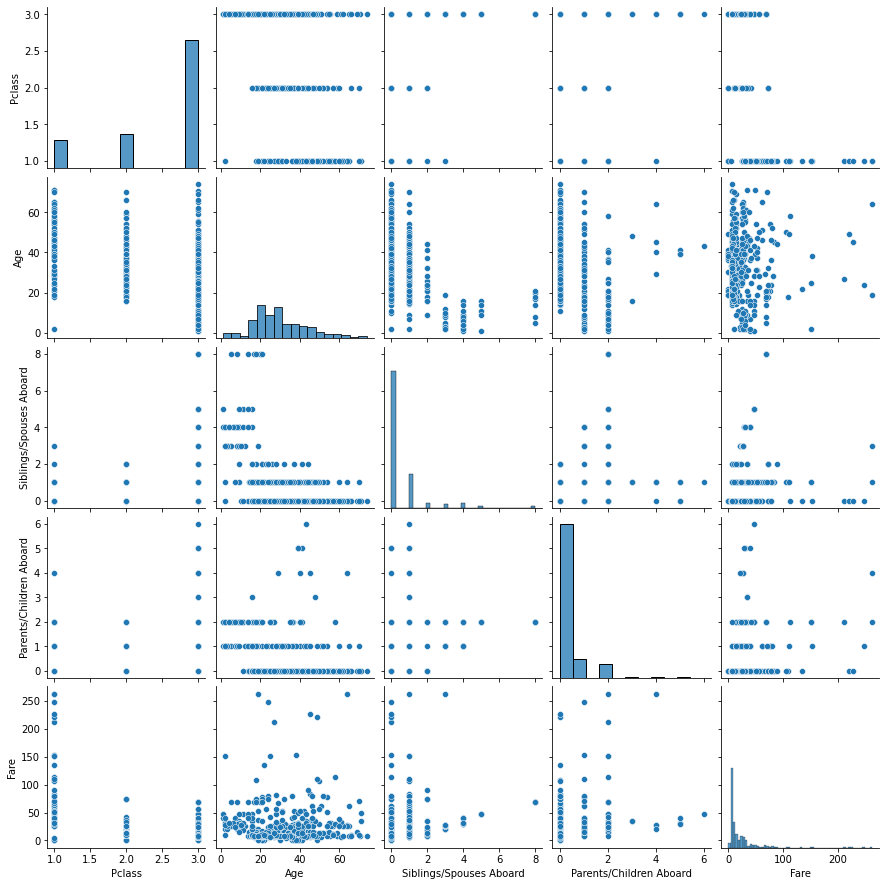

In [81]:
sns.pairplot(df_titanic[df_titanic.Survived.eq('Dead')])

In [82]:

def spearmanrho(df):
  rhovalues = df.corr(method='spearman')
  return rhovalues

spearmanrho(df_titanic)



,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Pclass,1.000000,-0.387982,-0.040348,-0.020617,-0.688234
Age,-0.387982,1.000000,-0.199269,-0.254234,0.156062
Siblings/Spouses Aboard,-0.040348,-0.199269,1.000000,0.449198,0.445980
Parents/Children Aboard,-0.020617,-0.254234,0.449198,1.000000,0.409202
Fare,-0.688234,0.156062,0.445980,0.409202,1.000000


You are looking for Jack. How many people named Jack on board?

In [83]:
# How many people named Jack on board?
Jacks = df_titanic[df_titanic['Name'].str.contains('Jack')]
len(Jacks)


1

In [84]:
Jacks

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
762,Dead,1,Dr. Arthur Jackson Brewe,male,46.0,0,0,39.6


# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers. 
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die. 

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [85]:
# It's up to you:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X = df_titanic.select_dtypes(exclude='object')
y = df_titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=36)

In [86]:
model = LogisticRegression().fit(X_train,y_train)

In [87]:
print("accuracy score on train set:",model.score(X_train, y_train))

accuracy score on train set: 0.718796992481203


In [88]:
print("accuracy score on test set:",model.score(X_test, y_test))

accuracy score on test set: 0.6441441441441441


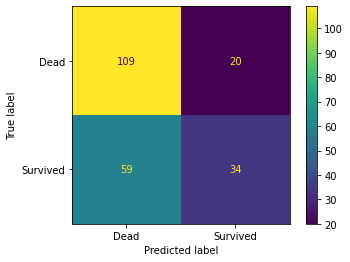

In [89]:
# Print the Confusion Matrix on the test set
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(values_format = '')

In [90]:
#How many iterations were needed to train this model?
model.n_iter_

array([55], dtype=int32)

# Model improvement

You can save all the people that the model will predict as dead. Change the weight of the classes to save all the people at risk.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

In [91]:
# Change the weight of the classes
#Fit the model on train set

model1 = LogisticRegression(class_weight = {'Dead' : 10})
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight={'Dead': 10}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy score on train set: 0.6300751879699248
accuracy score on test set: 0.5900900900900901


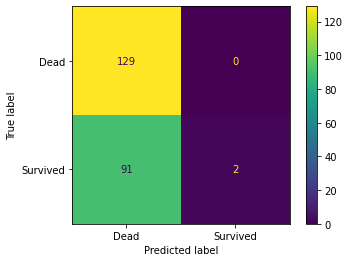

In [92]:
# Print the accuracy score on the train set and on the test set
# Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived"

print("accuracy score on train set:",model1.score(X_train, y_train))
print("accuracy score on test set:",model1.score(X_test, y_test))
predictions = model1.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(values_format = '')

# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

In [ ]:
# Compute the prediction probabilities on your test set
model1.predict_proba(X_test)



In [61]:
#Which column is about "survived" probability?
model1.classes_


array(['Dead', 'Survived'], dtype=object)

In [ ]:
#Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
survived=model1.predict_proba(X_test)[:,1]
survived

In [116]:
# Display the passengers by sorting most likely to survive first (sorted_values() method?
predictions_all = model1.predict_proba(X)[:,1]
df_titanic_out = df_titanic.copy()
df_titanic_out['pred_survived']=predictions_all.tolist()
df_titanic_out.sort_values(by='pred_survived',ascending=False)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,pred_survived
303,Survived,1,Master. Hudson Trevor Allison,male,0.92,1,2,151.5500,0.691707
295,Dead,1,Miss. Helen Loraine Allison,female,2.00,1,2,151.5500,0.679538
442,Survived,1,Master. Washington Dodge,male,4.00,0,2,81.8583,0.673094
686,Survived,1,Miss. Georgette Alexandra Madill,female,15.00,0,1,211.3375,0.552285
798,Survived,1,Master. William Thornton II Carter,male,11.00,1,2,120.0000,0.547345
...,...,...,...,...,...,...,...,...,...
278,Dead,3,Mr. Frank Duane,male,65.00,0,0,7.7500,0.003674
508,Dead,3,Mr. James Webber,male,66.00,0,0,8.0500,0.003490
535,Dead,3,Mr. Samuel Beard Risien,male,69.00,0,0,14.5000,0.003041
115,Dead,3,Mr. Patrick Connors,male,70.50,0,0,7.7500,0.002758


# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

In [117]:
# Select the 120 people with the highest probability of dying. Of these, how many actually survived?
pred_dead120 = df_titanic_out.sort_values(by='pred_survived').iloc[:120:,]
len(pred_dead120[pred_dead120.Survived.eq('Survived')])

18

# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?


In [121]:
#Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
montvila_vs_rice = df_titanic_out[df_titanic_out.Name.isin(['Rev. Juozas Montvila','Mrs. William (Margaret Norton) Rice'])]
montvila_vs_rice


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,pred_survived
881,Dead,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.125,0.067564
882,Dead,2,Rev. Juozas Montvila,male,27.0,0,0,13.000,0.079328




```
Make a prediction with probability for this 2 people?
Column pred_survived

Which one has a better chance to survive?
Rev.Juozas Montvila
```

